<a href="https://colab.research.google.com/github/Svaity/Self-Driving-Car-Software/blob/master/Traffic_Signs_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""

Title: Traffic Sign Classifier
@author: Shrey Vaity

1. Preprocessing 
2. Modified leNet model implementation 
3. Fine tuning model
4. Testing
5. Fit Generator - Data Augmentation

"""

'\n\nTitle: Traffic Sign Classification \n@author: Shrey Vaity\n1. Preprocessing \n2. Modified leNet model implementation \n3. Fine tuning model\n4. Testing\n5. Fit Generator\n\n'

In [0]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [0]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import Adam 
from keras.utils.np_utils import to_categorical 
from keras.layers import Dropout, Flatten 
from keras.layers.convolutional import Conv2D, MaxPooling2D


import pickle
import pandas as pd
import random

In [0]:
np.random.seed(0)

In [0]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)

print(type(train_data))

X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

<class 'dict'>


In [0]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "number of images not equal to number of layers "
assert(X_val.shape[0] == y_val.shape[0]), "number of images not equal to number of layers "
assert(X_test.shape[0] == y_test.shape[0]), "number of images not equal to number of layers "
assert(X_train.shape[1:] == (32, 32, 3)), "Dimensions not 32 32 3"
assert(X_val.shape[1:] == (32, 32, 3)), "Dimensions not 32 32 3"
assert(X_test.shape[1:] == (32, 32, 3)), "Dimensions not 32 32 3"

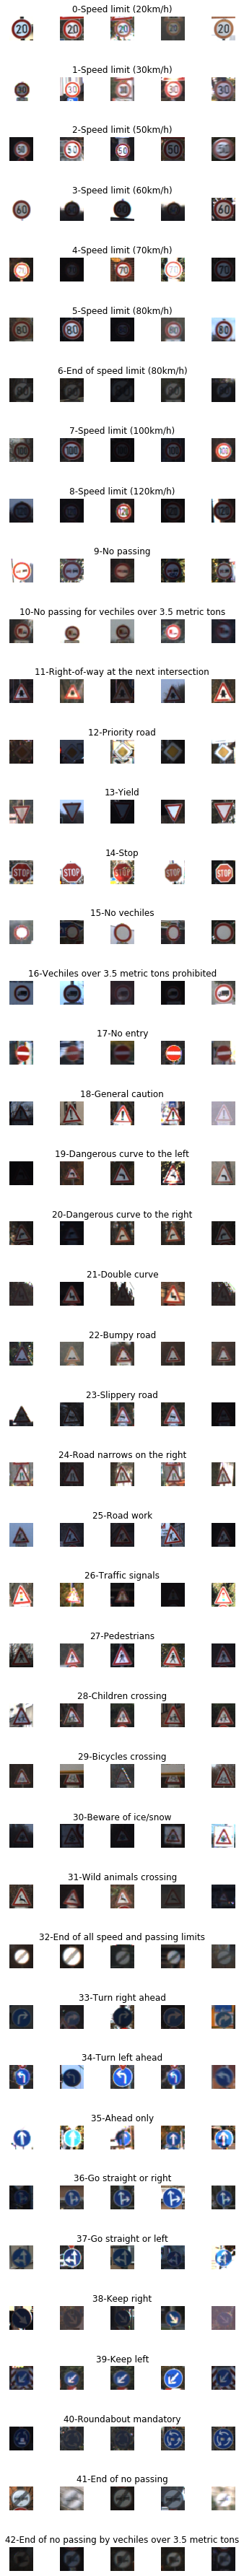

In [0]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
num_of_samples = []
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+"-"+row["SignName"])
            num_of_samples.append(len(x_selected))
    

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

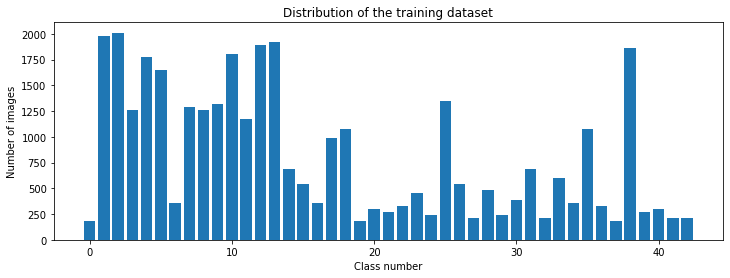

In [0]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3)
36


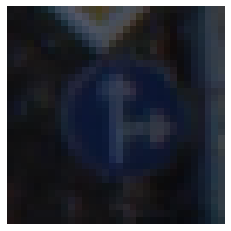

In [0]:
import cv2

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


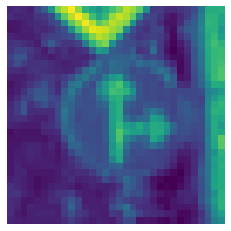

In [0]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)

(32, 32)


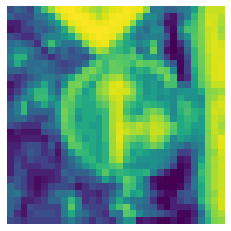

In [0]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img 
img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [0]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


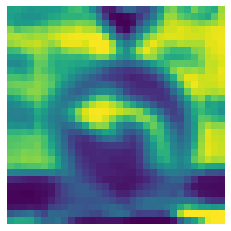

In [0]:
plt.imshow(X_train[random.randint(0, len(X_train)- 1)])
plt.axis("off")
print(X_train.shape)

In [0]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
datagen.fit(X_train)

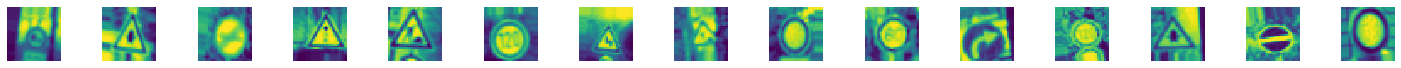

In [0]:
batches = datagen.flow(X_train, y_train, batch_size=20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32, 32))
  axs[i].axis('off')

In [0]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [0]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [0]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation="relu"))
  model.add(Conv2D(60, (5, 5), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(30, (3, 3), activation="relu"))
  model.add(Conv2D(30, (3, 3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  #model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(500, activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation="softmax"))
  #Compiling Model 
  model.compile(Adam(lr = 0.001), loss = "categorical_crossentropy", metrics = ['accuracy'])
  return model

In [0]:
model = modified_model()
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 480)              

In [0]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50), steps_per_epoch=2000, epochs=10, validation_data=(X_val, y_val), shuffle=1)

Epoch 1/10
2000/2000 [==============================] - 33s 16ms/step - loss: 0.8882 - acc: 0.7413 - val_loss: 0.1324 - val_acc: 0.9698
Epoch 2/10
2000/2000 [==============================] - 31s 16ms/step - loss: 0.2035 - acc: 0.9367 - val_loss: 0.0663 - val_acc: 0.9816
Epoch 3/10
2000/2000 [==============================] - 31s 16ms/step - loss: 0.1346 - acc: 0.9584 - val_loss: 0.0390 - val_acc: 0.9893
Epoch 4/10
2000/2000 [==============================] - 31s 16ms/step - loss: 0.1084 - acc: 0.9660 - val_loss: 0.0439 - val_acc: 0.9891
Epoch 5/10
2000/2000 [==============================] - 32s 16ms/step - loss: 0.0891 - acc: 0.9726 - val_loss: 0.0359 - val_acc: 0.9900
Epoch 6/10
2000/2000 [==============================] - 32s 16ms/step - loss: 0.0798 - acc: 0.9757 - val_loss: 0.0545 - val_acc: 0.9878
Epoch 7/10
2000/2000 [==============================] - 32s 16ms/step - loss: 0.0716 - acc: 0.9781 - val_loss: 0.0320 - val_acc: 0.9946
Epoch 8/10
2000/2000 [==========================

Text(0.5, 0, 'epoch')

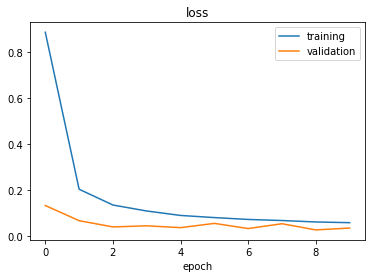

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', "validation"])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

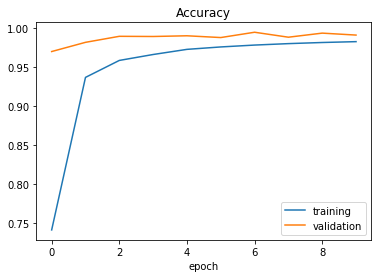

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', "validation"])
plt.title('Accuracy')
plt.xlabel('epoch')

In [0]:
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.12788921802931283
Test Accuracy: 0.9703879652095049


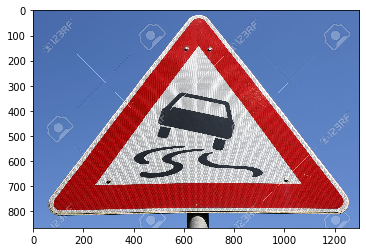

In [0]:
#fetch image
 
import requests
from PIL import Image
url = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


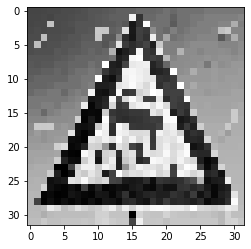

In [0]:
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [0]:
#Reshape reshape
img = img.reshape(1, 32, 32, 1)

In [0]:
 #Test image
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [23]
